In [10]:

import tweepy
from tweepy import StreamListener
from tweepy import Stream
import time
import pandas as pd
import json

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [4]:
'''class CustomStreamListener(StreamListener):

    def on_status(self, status): 
        print( status.author.screen_name, status.created_at, status.text)
        with open('file.txt', 'w') as f: 
                f.write('Author,Date,Text')
                
                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))


    def on_error(self, status_code):
        print ( sys.stderr, 'Encountered error with status code:', status_code)
        return True # Don't kill the stream

    def on_timeout(self):
        print ( sys.stderr, 'Timeout...')
        return True # Don't kill the stream




streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
streamingAPI.filter(track=['NocheDeLosMuseos'])
'''

"class CustomStreamListener(StreamListener):\n\n    def on_status(self, status): \n        print( status.author.screen_name, status.created_at, status.text)\n        with open('file.txt', 'w') as f: \n                f.write('Author,Date,Text')\n                \n                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))\n\n\n    def on_error(self, status_code):\n        print ( sys.stderr, 'Encountered error with status code:', status_code)\n        return True # Don't kill the stream\n\n    def on_timeout(self):\n        print ( sys.stderr, 'Timeout...')\n        return True # Don't kill the stream\n\n\n\n\nstreamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())\nstreamingAPI.filter(track=['NocheDeLosMuseos'])\n"

In [66]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


KeyboardInterrupt: 

In [67]:
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

In [ ]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="NocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('NocheDeLosMuseos2.json', 'w'))

Para cada tweet vamos a levantar
Autor
Id Autor
Texto
Autores de los retweets
Autores de los me gusta
Autores de los comentarios
fecha


In [84]:
for idtweet in data:
    print(data[idtweet]["retweets"],data[idtweet]["autor"])

[] ViveroFacundo
[] campoadentro16
[] gungurfinearts
[] JcVazquez58
[] SmmMaris
[[3412844729, 281051064]] BCNArgentina
[] chortp
[] eneroman_nora
[] Indembarg
[] ConamMutual
[[376723885, 216106179], [1590956791, 216106179], [851309247887441920, 216106179], [745316089500999680, 216106179], [2714777790, 216106179]] CulturaNacionAR
[] manuelsilsan
[] eneroman_nora
[] miguelgracioso2
[] eneroman_nora
[] DONJULIO400
[] SebZabs
[] Angel4029F
[] karlof11
[] Silvanabanana2
[] silvinanoguera
[[3412844729, 281051064]] BCNArgentina
[] MuseoRoca
[] MuseoDecorativo
[] Adrian80596816
[] silvana_luvera
[] miki_kusanagi
[] Lolenico
[] eneroman_nora
[] C_COM_5
[] Lore__Marquez
[] Claudia65803029
[] sebakatz
[[166148237, 983458110827323393]] MuseoOriental
[] PeronistasUnidx
[] maferrari55
[] Indembarg
[] SmmMaris
[] beatrizbostera3
[] LSpoliansky
[] mamriverplate
[] sebakatz
[] comoalilive
[] sebakatz
[] eneroman_nora
[] Lore__Marquez
[[1250537521, 281051064]] BCNArgentina
[] RcA1_2Prensa
[] Arturo31674

In [85]:
print(data)

{'1062030927331819525': {'fecha': '2018-11-12 17:14:39', 'texto': 'RT @FlacoStereo: GUSTAVO CERATI | \n\nSu acta original de nacimiento, 11 de Agosto de 1959, exhibida en el Registro Civil de la ciudad de Bue…', 'retweets': [], 'autor': 'ViveroFacundo', 'autorid': 937742727806144514}, '1062033180528705540': {'fecha': '2018-11-12 17:23:36', 'texto': 'RT @MindefArg: El fin de semana vivimos #LaNocheDeLosMuseos junto a los Regimientos de Granaderos y de Patricios https://t.co/Z1XATaT01y', 'retweets': [], 'autor': 'campoadentro16', 'autorid': 743629350537408512}, '1062044514733383680': {'fecha': '2018-11-12 18:08:38', 'texto': '#LaNocheDeLosMuseos 🌙\n¡Gracias a todxs lxs que nos acompañaron el sábado!\nLa presentación a cargo de Güngur Arts fu… https://t.co/2zxou9gSlp', 'retweets': [], 'autor': 'gungurfinearts', 'autorid': 154285638}, '1062035136039006209': {'fecha': '2018-11-12 17:31:22', 'texto': 'RT @AgroindustriaAR: La historia, la música, la innovación y los sabores del campo argentin

## Grafo desde la cuenta NocheMuseos


In [5]:
def checkFollow(usa,usb):
    relation = api.show_friendship(source_id=usa, target_id=usb)
    if relation[0].following: #I'm not sure if it should be "target" or "source" here
        return True
    return False

In [ ]:
#archivo=open('redegodelosmuseos.txt', 'w')
i=0
cuenta="NocheMuseos"
followers = api.followers_ids(cuenta)
#friends = api.friends_ids(cuenta)
#nodos=[]
aristas=[]

#len(followers)
#for follower in followers: 
#    nodos.append(API.)


for nodo1 in followers:
    for nodo2 in followers:
        if nodo1 != nodo2:
            if checkFollow(nodo1,nodo2):
                nuevoenlace=[nodo1, nodo2]
                aristas.append(nuevoenlace)
                print(nuevoenlace)

#print(followers)
#for follower in followers:    
#    aristas.append(follower.screen_name) 
#
#    try:
#        followers1 = api.followers(follower.screen_name,n=1000)    # seguidores de cada amigo la noche de los museos
#    except:
#        print ('Fallo')
#        pass
#    for follower1 in followers1:
#        aristas.append(follower1.screen_name)


In [3]:
data={'enlaces':aristas}
json.dump(data,open('redegodelosmuseos.json', 'w'))

NameError: name 'aristas' is not defined

### Armar el grafo

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [4]:
G=nx.Graph()
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[956016182, 281051064]
[177586243, 281051064]
[2895174736, 2493150020]
[1421735412, 2493150020]
[2866714078, 2493150020]
[2909495416, 2493150020]
[1043522615204298752, 295751970]
[789575266666512385, 295751970]
[925538863136813057, 295751970]
[956016182, 281051064]
[177586243, 281051064]
[184666963, 281051064]
[143688689, 281051064]
[1918875967, 281051064]
[3412844729, 281051064]
[4643594723, 549380248]
[95970921, 549380248]
[836100408, 549380248]
[186466069, 549380248]
[3385318204, 549380248]
[796721709873295360, 884834990651056134]
[307672796, 884834990651056134]
[722669754, 119790362]
[860541475330904065, 119790362]
[1546587204, 119790362]
[52728166, 119790362]
[614037279, 119790362]
[35209812, 119790362]
[2464635140, 119790362]
[217171448, 3435944566]
[77288753, 3435944566]
[84156832, 3435944566]
[137466684, 3435944566]
[437464665, 3435944566]
[816916760578420736, 2586882744]
[1030683435898208257, 2586882744]
[741487072578535425, 2586882744]
[2586882744, 2586882744]
[206709711, 585

[39067846, 37494271]
[481231680, 37494271]
[893911335599263745, 37494271]
[633410587, 37494271]
[128398482, 37494271]
[1029389546201534466, 37494271]
[293603575, 37494271]
[160067902, 2372440289]
[474813476, 2372440289]
[1210013696, 2372440289]
[2607374373, 2372440289]
[166692322, 2372440289]
[1057387970112696320, 2372440289]
[853950045724520449, 2372440289]
[4269204976, 2372440289]
[3297230386, 2372440289]
[2643977749, 2372440289]
[1705649064, 2372440289]
[986402591851581440, 2372440289]
[972908260125798407, 2372440289]
[143540924, 2372440289]
[715672847646113792, 2372440289]
[368600084, 2372440289]
[2228357684, 2372440289]
[3411128117, 2372440289]
[1915586472, 2372440289]
[2513949253, 2372440289]
[95970921, 216106179]
[844660166276628480, 216106179]
[1040708745171484675, 216106179]
[179791533, 376723885]
[592865322, 376723885]
[216106179, 376723885]
[4540822335, 376723885]
[1705539680, 900396192730943489]
[177586243, 900396192730943489]
[956016182, 900396192730943489]
[281051064, 900

[66488470, 3029027662]
[106506518, 183629339]
[2693534743, 883153468852252672]
[190639567, 883153468852252672]
[883153468852252672, 883153468852252672]
[283324857, 883153468852252672]
[912837689673752576, 883153468852252672]
[1129689918, 883153468852252672]
[2484526584, 883153468852252672]
[145370140, 883153468852252672]
[2989815711, 883153468852252672]
[888746710670946304, 883153468852252672]
[757924972237053953, 883153468852252672]
[798318572296663040, 883153468852252672]
[456641366, 883153468852252672]
[159916597, 883153468852252672]
[901592023504998400, 883153468852252672]
[188525384, 883153468852252672]
[721810921702694913, 727258832121004033]
[148000720, 727258832121004033]
[956916019842428929, 727258832121004033]
[864755060, 3026426255]
[586725782, 3026426255]
[707541786, 3026426255]
[80408010, 1360942670]
[191705422, 1360942670]
[1356815876, 1360942670]
[956016182, 66488470]
[153602427, 66488470]
[369000620, 66488470]
[1705539680, 66488470]
[901150486103035905, 1054119947943710

In [5]:
with open("NocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [9]:
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[995596884, 274289489]
[974618727063879680, 274289489]
[166827394, 274289489]
[50347559, 176189127]
[933148708841115648, 32953007]
[4253050349, 32953007]
[2717115618, 32953007]
[783493580, 32953007]
[365161396, 32953007]
[922246008716845059, 32953007]
[844660166276628480, 32953007]
[1054131329447718913, 32953007]
[92430410, 32953007]
[2645447404, 32953007]
[45452139, 32953007]
[184200331, 32953007]
[95578799, 32953007]
[318113913, 32953007]
[423680172, 32953007]
[633944919, 977559721220755458]
[2389856510, 808109062915244032]
[1056964315419475970, 3290180812]
[290701782, 3290180812]
[948012301, 276802474]
[350614177, 149739049]
[2446184005, 149739049]
[870235934, 2840836900]
[1040401581836066818, 2840836900]
[949962930728120321, 2840836900]
[176454907, 2575164194]
[196548214, 2575164194]
[702976332, 795779845838032898]
[3092621938, 751929335490174980]
[905115106530516993, 751929335490174980]
[2428898187, 751929335490174980]
[558823208, 751929335490174980]
[221493331, 182644738]
[921915

[848490952155181056, 247047815]
[25559612, 1447207944]
[38682345, 1447207944]
[716295311342321665, 372817493]
[262420447, 372817493]
[2437288435, 372817493]
[2730725598, 372817493]
[2562808030, 372817493]
[1382978396, 372817493]
[3382068411, 372817493]
[371928221, 372817493]
[846897091, 372817493]
[2473279994, 372817493]
[1246948357, 372817493]
[930991273447739393, 372817493]
[4906069697, 780769846745194496]
[245455831, 780769846745194496]
[991472733665054721, 288328296]
[76987954, 728012034]
[925555102840172545, 757619389]
[780337237, 757619389]
[254411975, 2238183656]
[2985597903, 2238183656]
[2847611950, 2238183656]
[4036379481, 2238183656]
[903678313142640641, 809399058997579776]
[809399058997579776, 809399058997579776]
[981215915088994306, 207760886]
[596839824, 207760886]
[196831479, 182644738]
[993305554310303744, 182644738]
[270144571, 182644738]
[144822660, 182644738]
[2474854471, 182644738]
[1697661450, 182644738]
[1431189150, 182644738]
[994972612940922881, 182644738]
[89798

/usr/local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


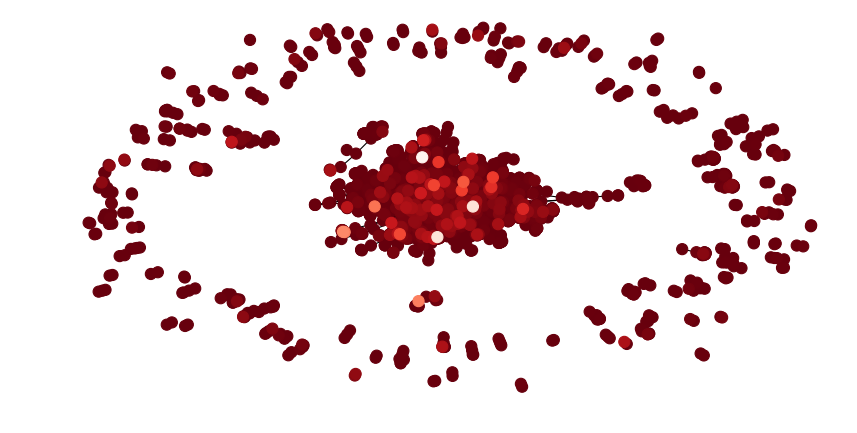

In [13]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(G, with_labels=False,node_size=100,
        node_color = sorted(list(dict(G.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

#nx.draw(G)
#plt.show()

In [12]:
print (nx.number_of_nodes(G),nx.number_of_edges(G))

4503 6133


In [6]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [18]:
# Exportar el grafo en formato adecuado para GEPHI
nx.write_gexf(Gc,'LaNochedelosMuseosCC.gexf')

In [8]:
print (nx.number_of_nodes(Gc),nx.number_of_edges(Gc))

2725 3785


In [24]:
#Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)
Grados=sorted(Bet,reverse=True,key=lambda x:Bet[x])
#print([data[i[0]]["autor"] for i in Grados[:10]])

for i in range(30):
    autor=api.get_user(Grados[i]).screen_name
    print (autor,Gc.degree(Grados[i]))

CulturaNacionAR 214
NocheMuseos 122
espacio_memoria 128
gcba 114
sebakatz 86
Adriveronica1 22
Exactas_UBA 83
ojovisor66 23
JuaNyP__ 86
mumimumi09 98
gendarmeria 81
batourplanner 24
MartaSinH83 14
nela_godoy 17
AbejaBlanca1303 4
FilmusDaniel 42
AySA_Oficial 32
EducacionAR 58
BancoCentral_AR 44
ciencia_ar 51
UCRCapital 38
Comunicacionucr 15
MuseoEvita 29
maumacrii 20
mercedesgm 19
dario_velez 16
LOLAMORA2005 12
fundacionTef_ar 26
AxelPino12 35
18Manifiesto 28


In [17]:
Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [23]:
Grados=sorted(Bet,reverse=True,key=lambda x:Bet[x])
print(Bet[Grados[1]])

0.16659461443721527


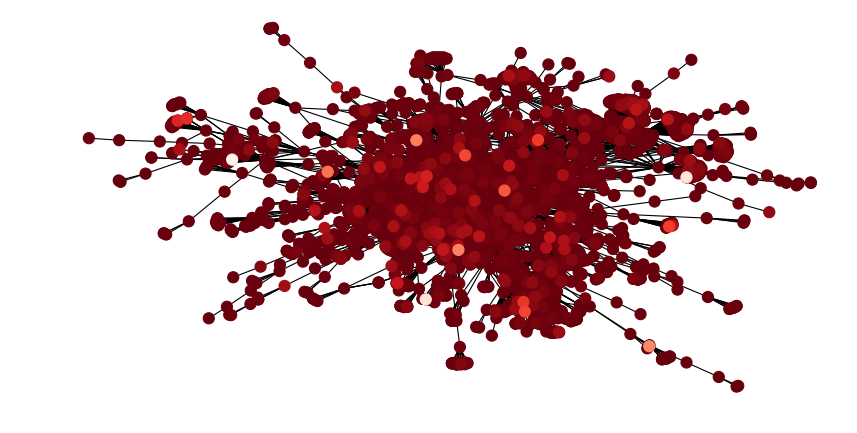

In [17]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Gc, with_labels=False,node_size=100,
        node_color = sorted(list(dict(Gc.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

In [ ]:
G=nx.Graph()
for arista in aristas:
        G.add_edge(arista[0],arista[1])

In [ ]:
"""
Tweter de algunos museos de la ciudad de buenos aires

1 Museo del cine @MuseoDelCineBA
2 Museo de la ciudad @MuseoCiudadGCBA
3 Museo de arte español @MuseoLarreta
4 Museo Historico Savedra @MuseoSaavedra
5 Museo Carlos Gardel @MuseoGardel
6 Museo de arte popular @MAPJH
7 Museo Isaac Fernández Blanco @museofernandezb
8 Museo de Arte MODERNO @modernoba
9 Museo Perlotti @MuseoPerlotti
10 Museo Artes Plásticas Eduardo Sívori @museo_sivori
11 Usina del Arte @UsinadelArte
12 Museo Evita @MuseoEvita
13 Bellas Artes @BellasArtesAR
14 Museo Mitre @MuseoMitre
15 MuseoArtDecorativoAR @MuseoDecorativo
16 Museo H. Sarmiento @MuseoSarmiento
17 Museo Histórico @MuseoHistorico
18 centro cultural borges @centroborges
19 Museo Bicentenario @MuseoOficial
20 Museo Casa Rosada @CasaRosada
21 Museo Libro y Lengua @MLibroLengua
22 Museo Histórico Nacional Cabildo Nacional @cabildonacional
23 Policía Federal Argentina @PFAOficial
24 Museo del Traje BA @museodeltrajeba
25 Museo BCRA  @BancoCentral_AR

"""